In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras import backend as K
from sklearn import metrics

In [2]:
LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img_rows, img_cols = train_x.shape[1], train_x.shape[2]
if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 1, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 1)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x /= 255
test_x /= 255

num_class = np.size(np.unique(train_y))

train_y = to_categorical(train_y, num_class)
test_y = to_categorical(test_y, num_class)

In [4]:
print(train_x.shape)
print(train_y.shape)
print(num_class)

(60000, 28, 28, 1)
(60000, 10)
10


In [5]:
model = models.Sequential()
model.add(Input(input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.30))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(num_class, activation='softmax'))

In [6]:
epochs = 20
batch_size = 128
opt = optimizers.Adam(0.001)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['acc'])

In [7]:
history = model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (test_x, test_y),
          verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - acc: 0.7917 - loss: 0.7658 - val_acc: 0.9697 - val_loss: 0.2060
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - acc: 0.9433 - loss: 0.3067 - val_acc: 0.9811 - val_loss: 0.1523
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - acc: 0.9580 - loss: 0.2415 - val_acc: 0.9842 - val_loss: 0.1348
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9630 - loss: 0.2136 - val_acc: 0.9863 - val_loss: 0.1163
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9672 - loss: 0.1895 - val_acc: 0.9866 - val_loss: 0.1100
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9685 - loss: 0.1801 - val_acc: 0.9872 - val_loss: 0.1008
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9716 - loss: 0.1665 - val_acc: 0.9898 - val_loss: 0.0935
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9727 - loss: 0.1592 - val_acc: 0.9890 - val_loss: 0.0917
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms

In [8]:
score = model.evaluate(test_x, test_y, verbose=0)
pred_y = model.predict(test_x)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation loss: 0.07125025242567062
Validation accuracy: 0.9929999709129333


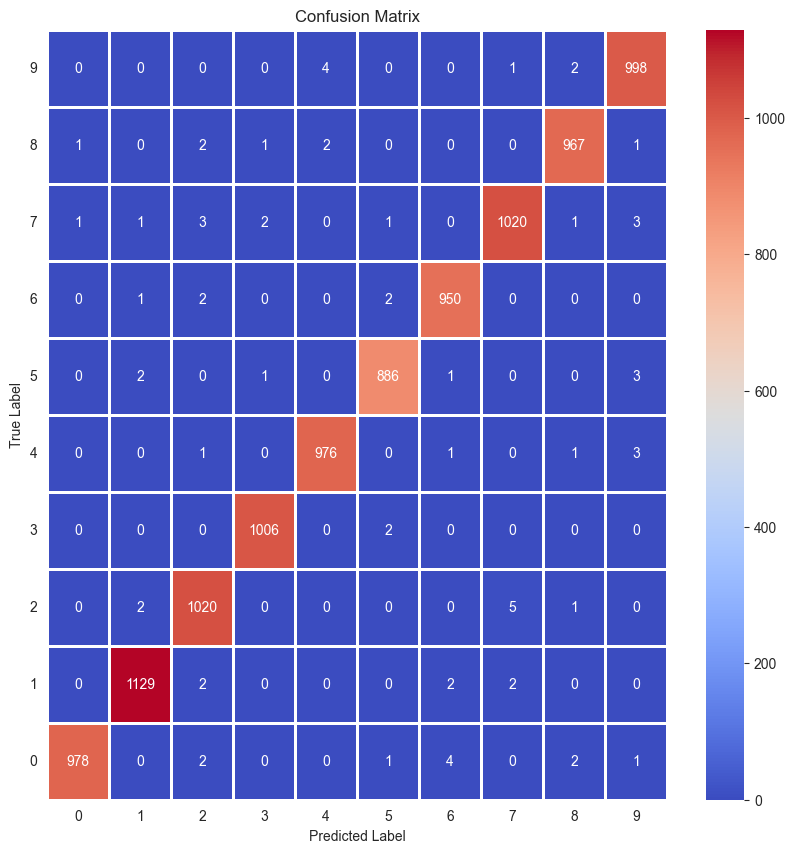

In [9]:
max_pred_y = np.argmax(pred_y, axis=1)
max_test_y = np.argmax(test_y, axis=1)
show_confusion_matrix(max_pred_y, max_test_y, num_class)

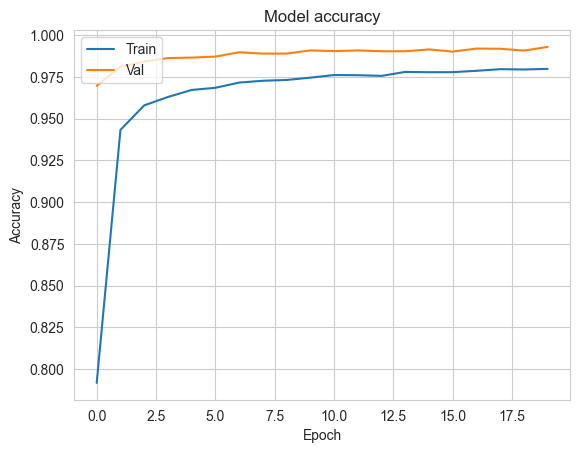

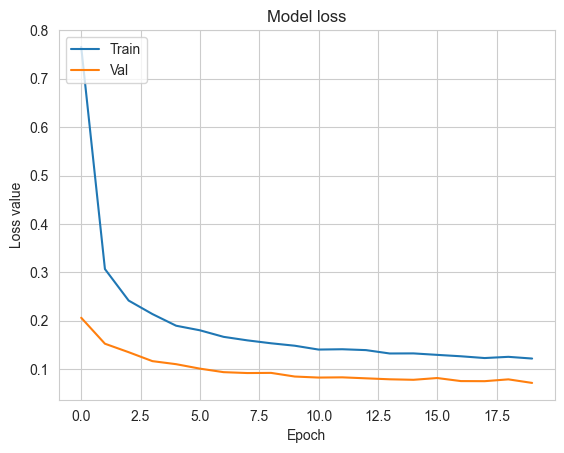

In [13]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()